In [1]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/grbpop/'
sys.path.insert(0, src_dir)
from GRB_population import GRBPopulation, create_GRB_population_from
import physics as ph
import numpy as np
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology, Lum_dist
from ECLAIRs import init_ECLAIRs
import plotting_functions as pf
import functional_forms as ff
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import logging
import f90_functions as f90f
from pathlib import Path

log = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG,
                    format='%(asctime)s.%(msecs)03d [%(levelname)s] %(message)s',
                    datefmt='%H:%M:%S')
logging.getLogger('matplotlib').setLevel(logging.WARNING)
plt.style.use('presentation')

In [15]:
paths_to_dir, paths_to_files = io.generate_paths()

10:46:52.185 [DEBUG] Root directory is /Users/palmerio/Science_projects/GRB_population_model
10:46:52.186 [DEBUG] Directory paths :
    'root'    : /Users/palmerio/Science_projects/GRB_population_model
    'obs'     : /Users/palmerio/Science_projects/GRB_population_model/observational_constraints
    'init'    : /Users/palmerio/Science_projects/GRB_population_model/init
    'output'  : /Users/palmerio/Science_projects/GRB_population_model/model_outputs
    'data'    : /Users/palmerio/Science_projects/GRB_population_model/data
    'cosmo'   : /Users/palmerio/Science_projects/GRB_population_model/data/cosmology
    'ECLAIRs' : /Users/palmerio/Science_projects/GRB_population_model/data/ECLAIRs
10:46:52.187 [DEBUG] File paths :
    'config'          : /Users/palmerio/Science_projects/GRB_population_model/init/config.yml
    'param'           : /Users/palmerio/Science_projects/GRB_population_model/init/parameters.yml
    'instrum'         : /Users/palmerio/Science_projects/GRB_population_mo

In [32]:
config, params, instruments, samples, obs_constraints = io.read_init_files(paths_to_files)
config['Nb_GRBs'] = '1e5'
config['samples'] = ['Stern']
config['constraints'] = ['Stern']
config['output_dir'] = 'debugger'
# paths_to_dir['output'] = paths_to_dir['output']/config['output_dir']
paths_to_dir['output']=Path('/Users/palmerio/Science_projects/GRB_population_model/model_outputs/debugger/')

10:49:55.989 [DEBUG] Input configuration:
Nb_GRBs: 1e5
constraints:
- Stern
- EpGBM
- eBAT6
output_dir: debugger
samples:
- Stern
- EpGBM
- eBAT6
- Swift
- ECLAIRs
- SHOALS
- GBM_sample
- BATSE_5B_sample

10:49:55.992 [DEBUG] Input parameters:
Cvar_distribution:
    correl_slope: -0.413
    mu: 0.04
    sigma: 0.22
luminosity_function:
    k_evol: 1.0
    logLbreak: 52.56
    logLmax: 53.0
    logLmin: 49.6989700043
    model: ES
    slope: 1.41
peak_energy_distribution:
    Ep0: 690
    alpha_amati: 0.3
    model: LN
    sigmaEp: 0.45
redshift_distribution:
    a: 0.94
    b: -0.52
    model: BExp
    zeta: null
    zm: 2.18
    zmax: 20
spectral_shape:
    alpha: 0.6
    beta: 2.5
    model: GBM
    shape: Band
t90obs_distribution:
    mu: 1.45
    sigma: 0.47



In [33]:
cosmo = init_cosmology(paths_to_dir['cosmo'])
ECLAIRs_prop = init_ECLAIRs(ECLAIRs_dir=paths_to_dir['ECLAIRs'],
                            ECLAIRs_config=instruments['ECLAIRs'])
samples['ECLAIRs']['pflx_min'] = ECLAIRs_prop['bkg_total']

incl_samples, incl_instruments, incl_constraints = io.create_config(config=config,
                                                       samples=samples,
                                                       instruments=instruments,
                                                       obs_constraints=obs_constraints)

10:49:56.154 [DEBUG] Read cosmology from directory /Users/palmerio/Science_projects/GRB_population_model/data/cosmology: [0.3, 0.7, 0.7]
10:49:56.155 [DEBUG] ==============================================
10:49:56.155 [DEBUG] ===           ECLAIRs instrument           ===
10:49:56.156 [DEBUG] ==============================================
10:49:56.157 [DEBUG] ECLAIRs energy channel: 4.0 to 150.0 keV
10:49:56.158 [DEBUG] ECLAIRs detection level: 6.5 sigmas
10:49:56.186 [DEBUG] Effective area: from 1.013650e+02 cm2 at 4.00 keV
10:49:56.187 [DEBUG] Effective area: to   1.811580e+02 cm2 at 250.00 keV
10:49:56.187 [DEBUG] Background: from 2.819620e+02 cts/s/keV at 4.00 keV
10:49:56.188 [DEBUG] Background: to   8.730200e-02 cts/s/keV at 250.00 keV
10:49:56.189 [DEBUG] ECLAIRs background: 3.098396e+03 cts/s from 4.00 keV to 150.00 keV
10:49:56.189 [DEBUG] ==============================================
10:49:56.190 [INFO] Including samples: ['Stern']
10:49:56.192 [DEBUG] Including samples:
Ste

In [37]:
# params['luminosity_function']['model'] = 'Fixed'
# params['luminosity_function']['logL0'] = 52.
# params['redshift_distribution']['model'] = 'Fixed'
# params['redshift_distribution']['z0'] = 2.
# params['peak_energy_distribution']['model'] = 'Fixed'
# params['peak_energy_distribution']['Ep0'] = 500.
params['spectral_shape']['model'] = 'D06'
params['spectral_shape']['shape'] = 'Band'
np.random.seed(12)
gp = create_GRB_population_from(Nb_GRBs=config['Nb_GRBs'],
                                cosmo=cosmo,
                                params=params,
                                incl_samples=incl_samples,
                                incl_instruments=incl_instruments,
                                incl_constraints=incl_constraints,
                                ECLAIRs_prop=ECLAIRs_prop,
                                output_dir=paths_to_dir['output'])


10:51:10.214 [INFO] Starting calculations of peak photon fluxes...
10:51:10.214 [DEBUG] For BATSE instrument [50, 300 keV]:
10:51:11.059 [DEBUG] Done in 0.843 s
10:51:11.086 [INFO] Starting calculations of peak photon fluxes...
10:51:11.087 [INFO] Starting calculations of peak energy fluxes...
10:51:11.087 [DEBUG] For BATSE instrument [50.0, 300.0 keV]:
10:51:11.919 [DEBUG] Done in 0.832 s
10:51:11.920 [DEBUG] Starting calculations of photon fluences...
10:51:11.923 [DEBUG] Done in 0.002 s
10:51:11.924 [DEBUG] Starting calculations of energy fluences...
10:51:11.927 [DEBUG] Done in 0.002 s
10:51:11.928 [INFO] Starting calculations of detection probability...
10:51:11.929 [DEBUG] Stern sample:
10:51:11.932 [DEBUG] Done in 0.002 s

|                                   SUMMARY                                    |
|                              Nb_GRBs = 1.00e+05                              |
|                     Output directory = debugger                              |
|                

In [38]:
params['spectral_shape']['shape'] = 'BPL'
np.random.seed(12)
gp2 = create_GRB_population_from(Nb_GRBs=config['Nb_GRBs'],
                                cosmo=cosmo,
                                params=params,
                                incl_samples=incl_samples,
                                incl_instruments=incl_instruments,
                                incl_constraints=incl_constraints,
                                ECLAIRs_prop=ECLAIRs_prop,
                                output_dir=paths_to_dir['output'])

10:51:13.143 [INFO] Starting calculations of peak photon fluxes...
10:51:13.144 [DEBUG] For BATSE instrument [50, 300 keV]:
10:51:13.850 [DEBUG] Done in 0.706 s
10:51:13.877 [INFO] Starting calculations of peak photon fluxes...
10:51:13.878 [INFO] Starting calculations of peak energy fluxes...
10:51:13.878 [DEBUG] For BATSE instrument [50.0, 300.0 keV]:
10:51:14.586 [DEBUG] Done in 0.708 s
10:51:14.587 [DEBUG] Starting calculations of photon fluences...
10:51:14.589 [DEBUG] Done in 0.001 s
10:51:14.590 [DEBUG] Starting calculations of energy fluences...
10:51:14.592 [DEBUG] Done in 0.001 s
10:51:14.593 [INFO] Starting calculations of detection probability...
10:51:14.594 [DEBUG] Stern sample:
10:51:14.596 [DEBUG] Done in 0.002 s

|                                   SUMMARY                                    |
|                              Nb_GRBs = 1.00e+05                              |
|                     Output directory = debugger                              |
|                

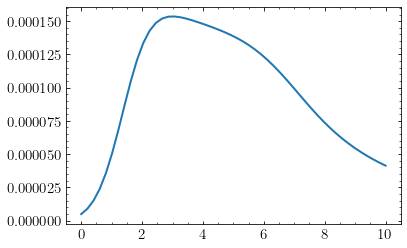

In [2]:
z = np.linspace(0,10)
y = ff.S12(z)
plt.plot(z,y)

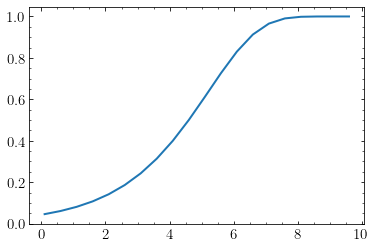

In [9]:
import scipy as sp
z = np.arange(0.1,10, 0.5)
Zth=0.15*0.015
Zsun=0.015
norm = sp.special.gammainc(0.84, (Zth/Zsun)**2 * 10**(0.3*z))
plt.plot(z,norm)

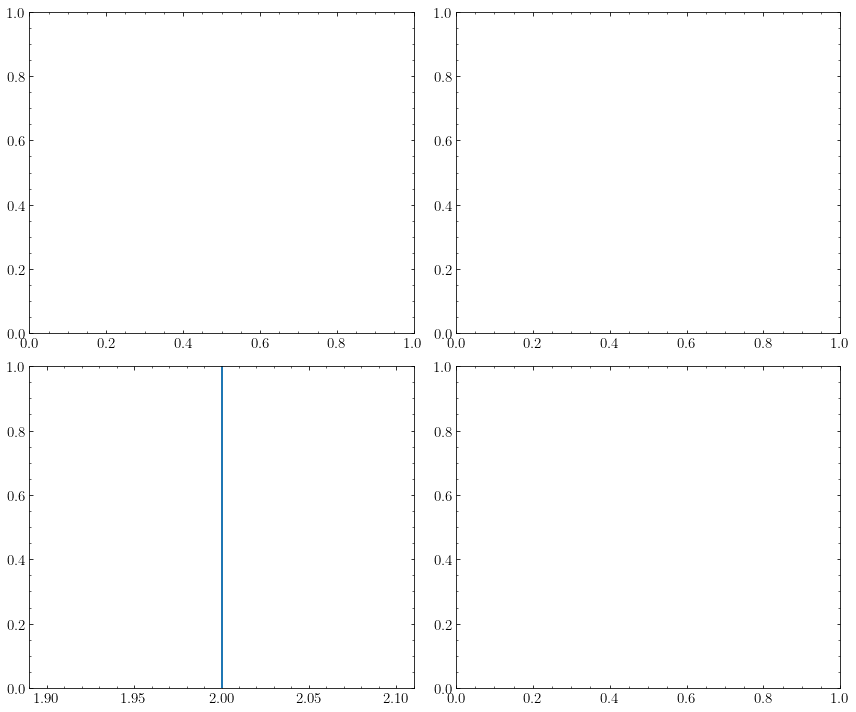

In [12]:
fig, axarr = plt.subplots(2,2, figsize=(12,10), tight_layout=True)
axes = axarr.flatten()
axes[2].axvline(2)